# Imports/Setup

## Libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Reading Dataset onto Dataframe

In [55]:
#df=pd.read_excel('/kaggle/input/motorrp/Motor RP Analyst Interview Activity.xlsx', sheet_name='Data')

In [56]:
df=pd.read_csv('/kaggle/input/datacsv/datacsv')

# Data Inspection

## Viewing Columns and Head

In [57]:
df.columns

Index(['Unnamed: 0', 'id', 'start_date', 'exposure', 'net_earned_premium',
       'net_written_premium', 'claim_count', 'is_capped_incurred', 'incurred',
       'capped_incurred', 'bi_incurred', 'ad_incurred', 'pd_incurred',
       'th_incurred', 'ws_incurred', 'bi_count', 'ad_count', 'pd_count',
       'th_count', 'ws_count', 'business_provider', 'cover', 'voluntary_xs',
       'ncd', 'pncd', 'vehicle_use', 'entitlement', 'overnight_location',
       'vehicle_value', 'vehicle_annual_mileage', 'vehicle_age',
       'vehicle_make', 'd1_age', 'd1_residency_years', 'd1_is_uk_resident',
       'transmission', 'region', 'gender', 'vehicle_purchase_date',
       'licence_test_date', 'primary_car_colour'],
      dtype='object')

In [58]:
df.head()

,Unnamed: 0,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
0,0,16042,2019-02-28,0.002740,0.00000,0.0000,0,NaN,NaN,NaN,...,FIAT,20,20,1,MANUAL,East Midlands,Male,2019-02-01 00:00:00,2016-11-26,Blue
1,1,41414,2019-03-20,1.000000,238.33650,238.3365,0,NaN,NaN,NaN,...,FORD,25,25,1,MANUAL,South East,Female,2017-11-01 00:00:00,2012-03-12,Grey
2,2,58837,2019-11-29,0.420765,77.31347,183.7450,0,NaN,NaN,NaN,...,PEUGEOT,42,42,1,MANUAL,West Midlands,Female,2016-09-01 00:00:00,1994-11-09,Silver
3,3,65415,2019-02-17,1.000000,494.98150,246.5586,0,NaN,NaN,NaN,...,NISSAN,31,31,1,AUTOMATIC,North West,Female,2019-02-16 00:00:00,2019-07-01,White
4,4,81565,2018-04-24,1.000000,120.05060,120.0506,0,NaN,NaN,NaN,...,KIA,61,61,1,MANUAL,South West,Male,2013-06-01 00:00:00,1974-04-07,Silver


## Finding the number of rows and columns

In [59]:
df.shape

(100000, 41)

Evidently this is a large dataset, with 41 columns and 100k rows

## Summary stats

In [60]:
df.describe()

,Unnamed: 0,id,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,th_count,ws_count,voluntary_xs,ncd,vehicle_value,vehicle_annual_mileage,vehicle_age,d1_age,d1_residency_years,d1_is_uk_resident
count,100000.000000,100000.000000,100000.000000,99978.000000,100000.000000,100000.000000,7419.000000,7419.000000,7419.000000,7419.000000,...,7419.000000,7419.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,49999.500000,50000.500000,0.719595,272.432194,364.273773,0.079340,0.001483,2797.004851,2589.680535,989.259222,...,0.022105,0.256638,197.238500,5.449590,5525.167150,6878.596280,8.378470,39.937510,38.400150,0.92853
std,28867.657797,28867.657797,0.344350,250.834453,281.664104,0.289941,0.038480,10651.871541,5338.339710,9691.253028,...,0.148859,0.447479,136.849868,3.637053,5765.353771,4056.018302,4.680995,15.415234,16.449685,0.25761
min,0.000000,1.000000,0.002732,-1134.753000,0.000000,0.000000,0.000000,-1854.640000,-1854.640000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,17.000000,0.000000,0.00000
25%,24999.750000,25000.750000,0.439891,114.164475,181.881875,0.000000,0.000000,34.500000,34.500000,0.000000,...,0.000000,0.000000,100.000000,2.000000,1695.000000,5000.000000,5.000000,26.000000,25.000000,1.00000
50%,49999.500000,50000.500000,0.937159,206.621700,284.771550,0.000000,0.000000,159.500000,159.500000,0.000000,...,0.000000,0.000000,250.000000,6.000000,3745.000000,6000.000000,8.000000,38.000000,36.000000,1.00000
75%,74999.250000,75000.250000,1.000000,359.323175,455.693300,0.000000,0.000000,2868.070000,2868.070000,0.000000,...,0.000000,1.000000,250.000000,9.000000,7100.000000,9000.000000,12.000000,51.000000,51.000000,1.00000
max,99999.000000,100000.000000,1.000000,3912.240000,4394.661000,4.000000,1.000000,489297.500000,55259.600000,478339.300000,...,2.000000,3.000000,600.000000,9.000000,163995.000000,400000.000000,41.000000,118.000000,118.000000,1.00000


In [61]:
df.loc[df['d1_age']>86]

,Unnamed: 0,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
46236,46236,24349,2019-04-30,1.0,701.8012,701.8012,0,NaN,NaN,NaN,...,SKODA,87,87,1,AUTOMATIC,South East,Male,2017-02-07 00:00:00,1973-11-24,Silver
75785,75785,2719,2018-12-08,1.0,467.1275,467.1275,0,NaN,NaN,NaN,...,HYUNDAI,118,118,1,MANUAL,South East,Female,2018-12-04 00:00:00,2018-08-04,Black


In [62]:
df.loc[df['vehicle_value']<2,'claim_count':'vehicle_make']

,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,ad_incurred,pd_incurred,th_incurred,ws_incurred,bi_count,...,voluntary_xs,ncd,pncd,vehicle_use,entitlement,overnight_location,vehicle_value,vehicle_annual_mileage,vehicle_age,vehicle_make
62302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,Y,C,IOD,D,1,5200,12,HYUNDAI


# Data Wrangling

## Data types

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              100000 non-null  int64  
 1   id                      100000 non-null  int64  
 2   start_date              100000 non-null  object 
 3   exposure                100000 non-null  float64
 4   net_earned_premium      99978 non-null   float64
 5   net_written_premium     100000 non-null  float64
 6   claim_count             100000 non-null  int64  
 7   is_capped_incurred      7419 non-null    float64
 8   incurred                7419 non-null    float64
 9   capped_incurred         7419 non-null    float64
 10  bi_incurred             7419 non-null    float64
 11  ad_incurred             7419 non-null    float64
 12  pd_incurred             7419 non-null    float64
 13  th_incurred             7419 non-null    float64
 14  ws_incurred          

## Checks for missing values

In [64]:
df.isna().sum()

Unnamed: 0                    0
id                            0
start_date                    0
exposure                      0
net_earned_premium           22
net_written_premium           0
claim_count                   0
is_capped_incurred        92581
incurred                  92581
capped_incurred           92581
bi_incurred               92581
ad_incurred               92581
pd_incurred               92581
th_incurred               92581
ws_incurred               92581
bi_count                  92581
ad_count                  92581
pd_count                  92581
th_count                  92581
ws_count                  92581
business_provider             0
cover                         0
voluntary_xs                  0
ncd                           0
pncd                          0
vehicle_use                   0
entitlement                   0
overnight_location            0
vehicle_value                 0
vehicle_annual_mileage        0
vehicle_age                   0
vehicle_

There are many missing values. However, we can contextualise them to determine whether they are expected, acceptable to have missing values or not. Firstly, we will look at the columns from is_capped_incurred to ws_count, as they each have 92581 missing values. By reading the dictionary, we can see that claim_count indicates if a claim is incurred, with 1 being yes and 0 being no. When claim_coint = 1, the aforementiond columns have values and when = 0, they don't. So the value counts of claim_counts can give us the answer.

### Checking claim_count

In [65]:
df["claim_count"].value_counts()

claim_count
0    92581
1     6937
2      452
3       27
4        3
Name: count, dtype: int64

We can see that there are a toatl of 92581 rows where claim_count = 0. This matches with there being 92581 missing values across the previous columns. However, we will verify further to ensure integrity

### Slicing dataframes where claim_count >= 1 and where claim_count = 0

In [66]:
df_claimcount1=df.loc[df["claim_count"]>= 1]
df_claimcount0=df.loc[df["claim_count"]== 0]

### Checking missing values in sliced dataframes

In [67]:
df_claimcount0.isna().sum()

Unnamed: 0                    0
id                            0
start_date                    0
exposure                      0
net_earned_premium           20
net_written_premium           0
claim_count                   0
is_capped_incurred        92581
incurred                  92581
capped_incurred           92581
bi_incurred               92581
ad_incurred               92581
pd_incurred               92581
th_incurred               92581
ws_incurred               92581
bi_count                  92581
ad_count                  92581
pd_count                  92581
th_count                  92581
ws_count                  92581
business_provider             0
cover                         0
voluntary_xs                  0
ncd                           0
pncd                          0
vehicle_use                   0
entitlement                   0
overnight_location            0
vehicle_value                 0
vehicle_annual_mileage        0
vehicle_age                   0
vehicle_

As we can see, all the 92581 missing values in those series of columns is when claim_count = 0, and when claim_count = 1 those columns have no missing values. This is as expected, meaning we can deduce there are no erroneous or unexpected missing values in this instance.

vehicle_make, transmission, region, licence_test_data and primary_car_colour have missing values, however these would not affect the main analyses. hence we can keep them as acceptable missing values and simply remove them from analyses pertaining to the values they are missing.

### NEP row missing values

There are 22 rows where NEP has a missing value. We will slice the dataset with this condition.

In [68]:
df_nepna=df.loc[df["net_earned_premium"].isna()]
df_nepna

,Unnamed: 0,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
12403,12403,39729,2019-12-02,0.412568,NaN,0.0,0,NaN,NaN,NaN,...,FIAT,24,24,1,MANUAL,South West,Female,2019-03-01 00:00:00,2018-12-01,White
28675,28675,34290,2018-12-01,0.564384,NaN,0.0,0,NaN,NaN,NaN,...,FORD,28,28,1,MANUAL,Scotland,Female,2017-07-01 00:00:00,2017-03-17,Black
29357,29357,87570,2018-11-14,0.608219,NaN,0.0,0,NaN,NaN,NaN,...,CITROEN,45,45,1,MANUAL,North West,Male,2018-11-13 00:00:00,1998-11-13,Black
30700,30700,80529,2018-09-13,1.000000,NaN,0.0,0,NaN,NaN,NaN,...,BMW,38,29,0,MANUAL,East Midlands,Male,2012-09-01 00:00:00,1998-08-30,Grey
31197,31197,44999,2018-12-20,0.512329,NaN,0.0,0,NaN,NaN,NaN,...,FORD,50,50,1,MANUAL,West Midlands,Male,2018-11-01 00:00:00,2014-02-10,Silver
33518,33518,34292,2018-09-09,0.786301,NaN,0.0,0,NaN,NaN,NaN,...,RENAULT,39,39,1,MANUAL,Scotland,Female,2018-08-01 00:00:00,1998-08-16,Orange
34562,34562,98830,2019-08-04,0.740437,NaN,0.0,0,NaN,NaN,NaN,...,VAUXHALL,25,25,1,MANUAL,South West,Female,2019-07-28 00:00:00,2015-07-27,NaN
38848,38848,83779,2019-06-10,0.890710,NaN,0.0,0,NaN,NaN,NaN,...,MINI,21,21,1,MANUAL,South East,Male,2018-06-01 00:00:00,2017-11-02,Black
40022,40022,59739,2018-11-27,1.000000,NaN,0.0,1,0.0,114.0,114.0,...,CITROEN,22,22,1,MANUAL,East Midlands,Female,2017-11-01 00:00:00,2014-03-31,Red
41601,41601,46202,2020-01-17,0.286885,NaN,0.0,0,NaN,NaN,NaN,...,BMW,33,33,1,AUTOMATIC,South West,Female,2019-08-01 00:00:00,2007-10-30,Red


ALL 22 of these rows have a NWP = 0. 2 of these rows have a claim with incurred costs. These cases should be investigated to understand the reason why NWP = 0 and hence NEP is NaN values. Since there are only 20 of them, these rows will be removed from the dataset

In [69]:
df2=df[df['net_earned_premium'].notna()]

In [70]:
df2.isna().sum()

Unnamed: 0                    0
id                            0
start_date                    0
exposure                      0
net_earned_premium            0
net_written_premium           0
claim_count                   0
is_capped_incurred        92561
incurred                  92561
capped_incurred           92561
bi_incurred               92561
ad_incurred               92561
pd_incurred               92561
th_incurred               92561
ws_incurred               92561
bi_count                  92561
ad_count                  92561
pd_count                  92561
th_count                  92561
ws_count                  92561
business_provider             0
cover                         0
voluntary_xs                  0
ncd                           0
pncd                          0
vehicle_use                   0
entitlement                   0
overnight_location            0
vehicle_value                 0
vehicle_annual_mileage        0
vehicle_age                   0
vehicle_

In [71]:
df2.shape

(99978, 41)

100000-22=99978, hence the specified rows have been successfully removed.

## Duplicates

In [72]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

There are no duplicated values in this dataset

# Analysis

## How many claims are there in total?

In [73]:
claims_total_cleaned = df2['claim_count'].sum()
print(f"There are {claims_total_cleaned} total claims")

There are 7932 total claims


In [74]:
claims_total_default = df['claim_count'].sum()
print(f"There are {claims_total_default} total claims")

There are 7934 total claims


## Average value of the claims

### Checking rows where the incurred costs exceed 50000

In [75]:
df_claimcount1.loc[df_claimcount1['incurred']>=50000]


,Unnamed: 0,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
1219,1219,926,2019-05-06,0.778689,156.8325,158.8851,1,1.0,158210.50,50000.0,...,RENAULT,58,58,1,MANUAL,Yorkshire,Male,2019-04-07 00:00:00,1994-04-07,Silver
13244,13244,73616,2018-11-26,1.000000,256.7595,256.7595,1,1.0,69157.00,50100.0,...,VAUXHALL,47,47,1,MANUAL,Yorkshire,Male,2018-05-01 00:00:00,1990-01-03,Silver
19983,19983,39572,2018-06-22,1.000000,336.2649,298.5108,1,1.0,156818.90,50100.0,...,SAAB,35,35,1,AUTOMATIC,South East,Female,2015-11-01 00:00:00,2001-06-19,Grey
34043,34043,42651,2018-12-21,0.383562,1343.1140,1822.8320,2,1.0,55619.67,55259.6,...,FIAT,21,21,1,MANUAL,South East,Male,2018-12-20 00:00:00,2018-10-22,Black
41597,41597,34816,2019-01-18,1.000000,363.7175,301.6689,1,1.0,50433.00,50000.0,...,HONDA,28,28,1,MANUAL,South East,Male,2019-06-22 00:00:00,2008-05-16,Blue
61920,61920,5670,2019-04-03,1.000000,1155.7860,1155.7860,1,1.0,350073.60,50075.0,...,FORD,23,20,0,MANUAL,East Midlands,Female,2019-04-01 00:00:00,2019-02-12,White
63022,63022,41161,2018-09-13,1.000000,667.5200,667.5200,1,1.0,440802.30,49895.0,...,VAUXHALL,19,19,1,MANUAL,Wales,Male,2017-03-01 00:00:00,2017-09-01,White
67165,67165,72019,2019-10-22,0.467213,456.8726,870.9134,1,1.0,57387.50,49995.0,...,LANDROVER,33,14,0,AUTOMATIC,East Anglia,Male,2018-10-01 00:00:00,2007-11-02,NaN
76870,76870,47548,2018-05-23,1.000000,547.6455,503.4993,1,1.0,56601.53,50100.0,...,PEUGEOT,48,48,1,MANUAL,Yorkshire,Female,2018-07-13 00:00:00,2017-05-12,NaN
83874,83874,77232,2018-09-07,0.808219,1306.2230,945.8155,1,1.0,489297.50,50050.0,...,VAUXHALL,18,18,1,MANUAL,South East,Male,2017-01-28 00:00:00,2017-09-07,Blue


there are 11 rows where the incurred exceeds the specified cap of 50000. For all of these cases, there was a cap of 50000

In [76]:
df_claimcount1.loc[df_claimcount1['capped_incurred']>=50000]

,Unnamed: 0,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
1219,1219,926,2019-05-06,0.778689,156.8325,158.8851,1,1.0,158210.50,50000.0,...,RENAULT,58,58,1,MANUAL,Yorkshire,Male,2019-04-07 00:00:00,1994-04-07,Silver
13244,13244,73616,2018-11-26,1.000000,256.7595,256.7595,1,1.0,69157.00,50100.0,...,VAUXHALL,47,47,1,MANUAL,Yorkshire,Male,2018-05-01 00:00:00,1990-01-03,Silver
19983,19983,39572,2018-06-22,1.000000,336.2649,298.5108,1,1.0,156818.90,50100.0,...,SAAB,35,35,1,AUTOMATIC,South East,Female,2015-11-01 00:00:00,2001-06-19,Grey
34043,34043,42651,2018-12-21,0.383562,1343.1140,1822.8320,2,1.0,55619.67,55259.6,...,FIAT,21,21,1,MANUAL,South East,Male,2018-12-20 00:00:00,2018-10-22,Black
41597,41597,34816,2019-01-18,1.000000,363.7175,301.6689,1,1.0,50433.00,50000.0,...,HONDA,28,28,1,MANUAL,South East,Male,2019-06-22 00:00:00,2008-05-16,Blue
61920,61920,5670,2019-04-03,1.000000,1155.7860,1155.7860,1,1.0,350073.60,50075.0,...,FORD,23,20,0,MANUAL,East Midlands,Female,2019-04-01 00:00:00,2019-02-12,White
76870,76870,47548,2018-05-23,1.000000,547.6455,503.4993,1,1.0,56601.53,50100.0,...,PEUGEOT,48,48,1,MANUAL,Yorkshire,Female,2018-07-13 00:00:00,2017-05-12,NaN
83874,83874,77232,2018-09-07,0.808219,1306.2230,945.8155,1,1.0,489297.50,50050.0,...,VAUXHALL,18,18,1,MANUAL,South East,Male,2017-01-28 00:00:00,2017-09-07,Blue
97673,97673,92239,2018-09-21,1.000000,778.8980,748.1524,1,1.0,209362.20,50050.0,...,FORD,21,21,1,MANUAL,East Anglia,Female,2018-08-01 00:00:00,2018-08-17,Blue


Interestingly, there are instances where the capped_incurred exceeds the specified cap of 50000. Most of these are only slightly above 50000 so could have just been accepted, however one is 55259.60. This is significant because that is over 10% above the specified cap and this case should be further investigated to determine if it was an error where more was coevered than it should have been or a data entry error

Due to this, two averages will be calculated. One that is the incurred average and one that is the capped inccured average. This is because the capped incurred average will consider only the claim value which the customer can claim up to, and ensure extreme incurred costs don't skew the average. Whereas the incurred average will consider the total incurred cost which can be useful to estimate the severity and true financial cost of certain claims e.g. an expensive car

In [77]:
capped_incurred_average = df2['capped_incurred'].mean()
incurred_average = df2['incurred'].mean()
print(f"capped_incurred Average Claim Value: {capped_incurred_average}")
print(f"incurred Average Claim Value: {incurred_average}")

capped_incurred Average Claim Value: 2590.3324646083324
incurred Average Claim Value: 2797.712685721991


In [78]:
df_claimcount1.loc[34043]

Unnamed: 0                                   34043
id                                           42651
start_date                              2018-12-21
exposure                                  0.383562
net_earned_premium                        1343.114
net_written_premium                       1822.832
claim_count                                      2
is_capped_incurred                             1.0
incurred                                  55619.67
capped_incurred                            55259.6
bi_incurred                                14400.0
ad_incurred                                 881.28
pd_incurred                               40338.39
th_incurred                                    0.0
ws_incurred                                    0.0
bi_count                                       2.0
ad_count                                       1.0
pd_count                                       2.0
th_count                                       0.0
ws_count                       

In [79]:
df_claimcount1["total"] = df_claimcount1.bi_incurred + df_claimcount1.ad_incurred + df_claimcount1.pd_incurred + df_claimcount1.th_incurred + df_claimcount1.ws_incurred

In [80]:
df_claimcount1["diff"]= df_claimcount1.incurred - df_claimcount1["total"]

In [81]:
df_claimcount1["diff"].value_counts()

diff
 0.000000e+00    7085
-9.094947e-13      46
 9.094947e-13      42
-1.818989e-12      36
 1.818989e-12      30
 7.105427e-15      30
-3.637979e-12      21
-4.440892e-16      18
-4.547474e-13      16
 4.547474e-13      16
 3.637979e-12      11
 5.684342e-14       9
-5.684342e-14       8
 3.552714e-15       7
-1.421085e-14       6
 2.273737e-13       6
 5.329071e-15       5
-2.273737e-13       5
 1.136868e-13       4
-2.842171e-14       3
 1.421085e-14       2
-1.136868e-13       2
-7.275958e-12       2
 2.842171e-14       2
 1.000000e-02       1
-2.000000e-02       1
 2.000000e-02       1
-2.910383e-11       1
-7.105427e-15       1
 2.131628e-14       1
-2.886580e-15       1
Name: count, dtype: int64

In [82]:
df_claimcount1.loc[df_claimcount1['diff']>0.0001]

,Unnamed: 0,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,...,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour,total,diff
1219,1219,926,2019-05-06,0.778689,156.8325,158.8851,1,1.0,158210.5,50000.0,...,58,1,MANUAL,Yorkshire,Male,2019-04-07 00:00:00,1994-04-07,Silver,158210.49,0.01
83874,83874,77232,2018-09-07,0.808219,1306.2230,945.8155,1,1.0,489297.5,50050.0,...,18,1,MANUAL,South East,Male,2017-01-28 00:00:00,2017-09-07,Blue,489297.48,0.02


In [83]:
df_claimcount1.loc[[61920,1219,83874],'incurred':'ws_incurred']

,incurred,capped_incurred,bi_incurred,ad_incurred,pd_incurred,th_incurred,ws_incurred
61920,350073.6,50075.0,344822.7,87.00,5079.42,0.0,84.5
1219,158210.5,50000.0,157321.9,888.59,0.00,0.0,0.0
83874,489297.5,50050.0,478339.3,988.18,9970.00,0.0,0.0


## year to year trends

### converting to month-year format for visibility in continous time series

In [84]:
#new df
dfMY=df2
dfMY2=df2.loc[df["claim_count"]>= 1]

dfMY['start_date'] = pd.to_datetime(df2['start_date'])
dfMY['month_year'] = dfMY['start_date'].dt.to_period('M').dt.to_timestamp()

dfMY2['start_date'] = pd.to_datetime(df2['start_date'])
dfMY2['month_year'] = dfMY['start_date'].dt.to_period('M').dt.to_timestamp()

### claim count vs time

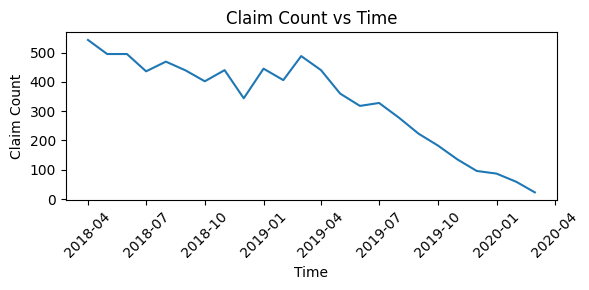

In [85]:
df_claimsvstime=dfMY.groupby("month_year").agg({"claim_count":'sum'}).reset_index()
plt.figure(figsize=(6,3))
sns.lineplot(data=df_claimsvstime,x="month_year",y="claim_count")
plt.title('Claim Count vs Time')
plt.xlabel('Time')
plt.ylabel('Claim Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

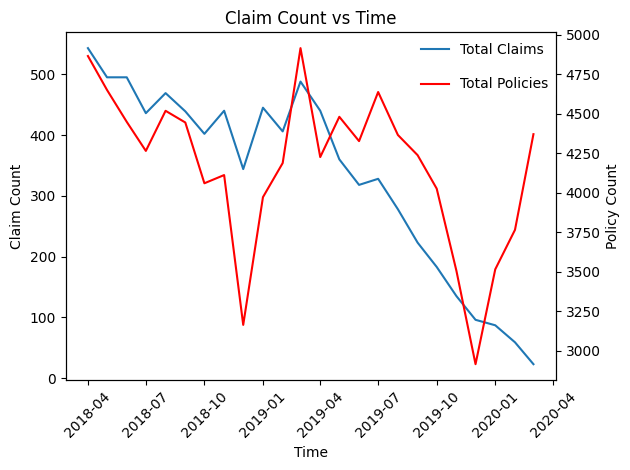

In [86]:
df_claimsvstime=dfMY.groupby("month_year").agg({
    "claim_count":'sum',
    "id": 'count'
}).reset_index()
fig, ax1 = plt.subplots()
sns.lineplot(data=df_claimsvstime,x="month_year",y="claim_count",label="Total Claims")
plt.legend(edgecolor="white",loc="center left",bbox_to_anchor=(0.7,0.95))
plt.title('Claim Count vs Time')
plt.xlabel('Time')
plt.ylabel('Claim Count')
plt.xticks(rotation=45)
ax2=ax1.twinx()
sns.lineplot(data=df_claimsvstime,x="month_year",y="id",color="red",label="Total Policies")
ax2.set_ylabel('Policy Count')
plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.85),edgecolor="white")
plt.tight_layout()
plt.show()


### capped incurred and incurred over time

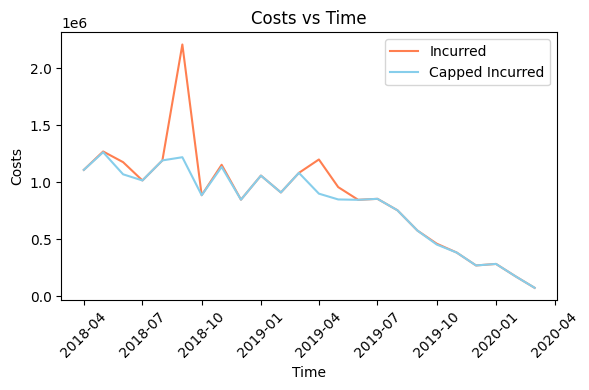

In [87]:
df_incurredvstime=dfMY.groupby("month_year").agg({'incurred':'sum','capped_incurred':'sum'}).reset_index()
plt.figure(figsize=(6,4))
sns.lineplot(data=df_incurredvstime,x="month_year",y="incurred",label="Incurred",color='coral')
sns.lineplot(data=df_incurredvstime, x="month_year", y="capped_incurred", label="Capped Incurred", color="skyblue")
plt.title('Costs vs Time')
plt.xlabel('Time')
plt.ylabel('Costs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### exposure vs time

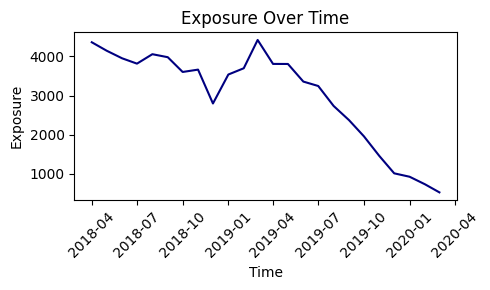

In [88]:
df_exposurevstime=dfMY.groupby("month_year").agg({'exposure':'sum'}).reset_index()
plt.figure(figsize=(5,3))
sns.lineplot(data=df_exposurevstime,x="month_year",y="exposure",color='navy')
plt.title('Exposure Over Time')
plt.xlabel('Time')
plt.ylabel('Exposure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### NEP vs time

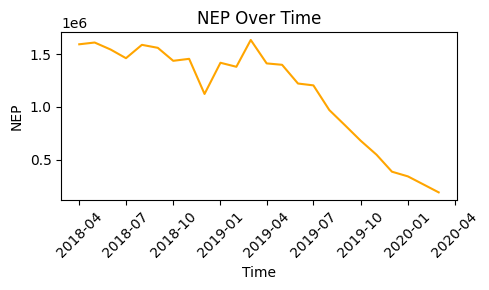

In [89]:
df_NEPvstime=dfMY.groupby("month_year").agg({'net_earned_premium':'sum'}).reset_index()
plt.figure(figsize=(5,3))
sns.lineplot(data=df_NEPvstime,x="month_year",y="net_earned_premium",color='orange')
plt.title('NEP Over Time')
plt.xlabel('Time')
plt.ylabel('NEP')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### claims vs time, by category

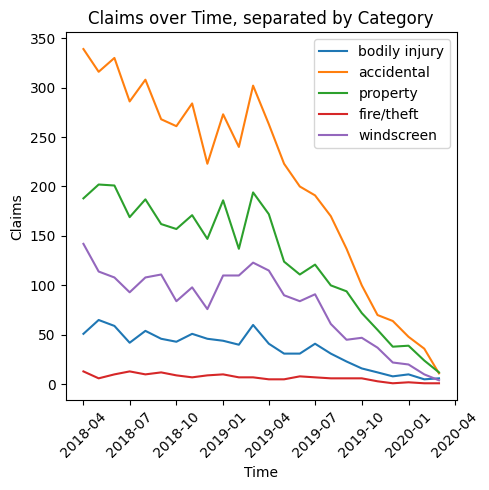

In [90]:
df_incurredcatvstime=dfMY2.groupby("month_year").agg({
    'bi_count':'sum',
    'ad_count':'sum',
    'pd_count':'sum',
    'th_count':'sum',
    'ws_count':'sum'
}).reset_index()
plt.figure(figsize=(5,5))
sns.lineplot(data=df_incurredcatvstime,x="month_year",y="bi_count",label="bodily injury")
sns.lineplot(data=df_incurredcatvstime,x="month_year",y="ad_count",label="accidental")
sns.lineplot(data=df_incurredcatvstime,x="month_year",y="pd_count",label="property")
sns.lineplot(data=df_incurredcatvstime,x="month_year",y="th_count",label="fire/theft")
sns.lineplot(data=df_incurredcatvstime,x="month_year",y="ws_count",label="windscreen")
plt.title('Claims over Time, separated by Category')
plt.xlabel('Time')
plt.ylabel('Claims')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Incurred over Time, Separated by Category

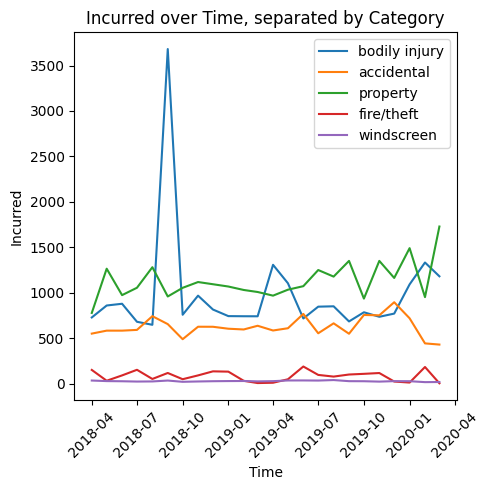

In [91]:
df_incurredcatvstime=dfMY2.groupby("month_year").agg({
    'bi_incurred':'mean',
    'ad_incurred':'mean',
    'pd_incurred':'mean',
    'th_incurred':'mean',
    'ws_incurred':'mean'
}).reset_index()
plt.figure(figsize=(5,5))
sns.lineplot(data=df_incurredcatvstime,x="month_year",y="bi_incurred",label="bodily injury")
sns.lineplot(data=df_incurredcatvstime,x="month_year",y="ad_incurred",label="accidental")
sns.lineplot(data=df_incurredcatvstime,x="month_year",y="pd_incurred",label="property")
sns.lineplot(data=df_incurredcatvstime,x="month_year",y="th_incurred",label="fire/theft")
sns.lineplot(data=df_incurredcatvstime,x="month_year",y="ws_incurred",label="windscreen")
plt.title('Incurred over Time, separated by Category')
plt.xlabel('Time')
plt.ylabel('Incurred')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Total Claims and Mean Claim value (Capped) over time

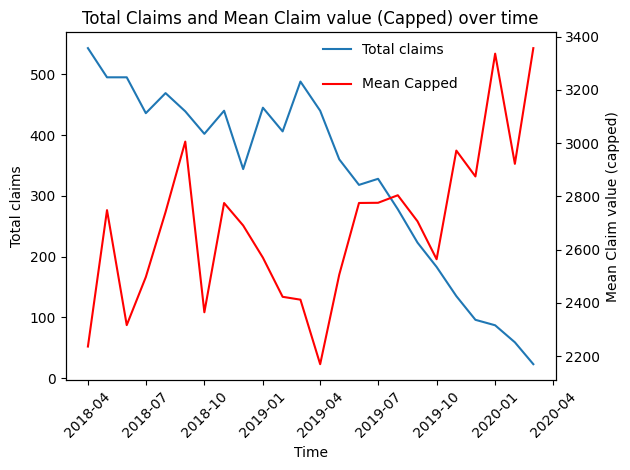

In [92]:
df_claimsvstime=dfMY2.groupby("month_year").agg({"claim_count":'sum',"capped_incurred":"mean"}).reset_index()
fig, ax1 = plt.subplots()
sns.lineplot(data=df_claimsvstime,x="month_year",y="claim_count",label="Total claims")
plt.legend(edgecolor="white",loc="center left",bbox_to_anchor=(0.5,0.95))
plt.xticks(rotation=45)
ax1.set_xlabel("Time")
ax1.set_ylabel("Total claims")
#ax1.legend(loc="upper right")
ax2=ax1.twinx()
sns.lineplot(data=df_claimsvstime,ax=ax2,x="month_year",y="capped_incurred",color="red",label="Mean Capped")
ax2.set_ylabel("Mean Claim value (capped)")
#ax2.legend(loc=0)
plt.legend(loc='center left', bbox_to_anchor=(0.5, 0.85),edgecolor="white")
plt.title("Total Claims and Mean Claim value (Capped) over time")
plt.tight_layout()
plt.show()

This possibly infers an inverse relationship between total claims and claim value: over time, as total claims decreases, their average value increased. This could be indicative of an insurance policy change in the company over the time span. Perhaps what constituted a claim in 2018 is no longer valid in 2020. As such, a lot of smaller claims with less damages no longer qualified, reducing the total number of claims whilst driving up the average value.

### Total Claims and Mean Claim value (Uncapped) over time

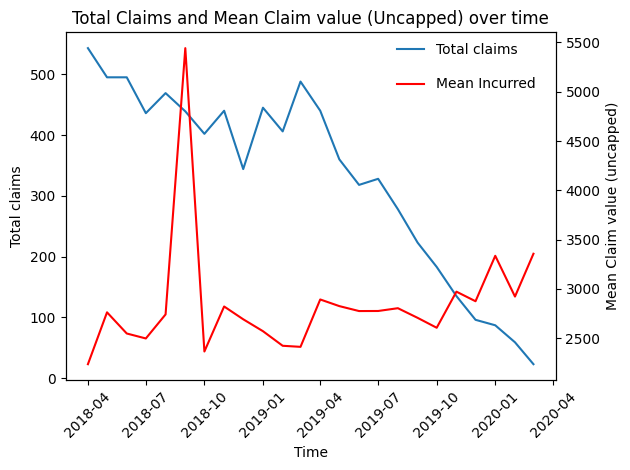

In [93]:
df_claimsvstime=dfMY2.groupby("month_year").agg({"claim_count":'sum',"incurred":"mean"}).reset_index()
fig, ax1 = plt.subplots()
sns.lineplot(data=df_claimsvstime,x="month_year",y="claim_count",label="Total claims")
plt.legend(edgecolor="white",loc="center left",bbox_to_anchor=(0.65,0.95))
plt.xticks(rotation=45)
ax1.set_xlabel("Time")
ax1.set_ylabel("Total claims")
#ax1.legend(loc="upper right")
ax2=ax1.twinx()
sns.lineplot(data=df_claimsvstime,ax=ax2,x="month_year",y="incurred",color="red",label="Mean Incurred")
ax2.set_ylabel("Mean Claim value (uncapped)")
#ax2.legend(loc=0)
plt.legend(loc='center left', bbox_to_anchor=(0.65, 0.85),edgecolor="white")
plt.title("Total Claims and Mean Claim value (Uncapped) over time")
plt.tight_layout()
plt.show()

This demonstrates the purpose of the capped_incurred column. Using the incurred column can result in massive spikes that can strongly skew the results. If it can have this impact on a totality analysis, then it can be even more impactful when the specificity is increased i.e. a regional or car model analysis. As such, the purpose of the capped_incurred column is to eliminate outliers when investigating typical performance metrics and ensures they're more representative of the average. However, this does not mean the incurred column is pointless since it allows us to investigate the actual costs and risks taken up by the company, and can be used for catastrophe analysis

### Voluntary excess

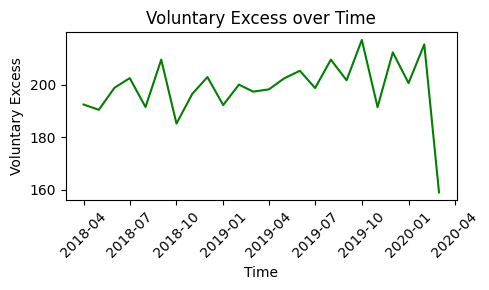

In [94]:
df_volxs=dfMY2.groupby("month_year").agg({'voluntary_xs':'mean'}).reset_index()
plt.figure(figsize=(5,3))
sns.lineplot(data=df_volxs,x="month_year",y="voluntary_xs",color='green')
plt.title('Voluntary Excess over Time')
plt.xlabel('Time')
plt.ylabel('Voluntary Excess')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

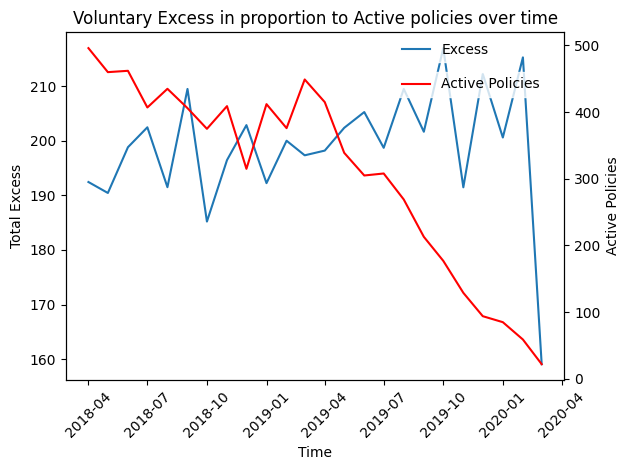

In [95]:
df_volxsprop = dfMY2.groupby('month_year').agg({
    'voluntary_xs': 'sum',
    'id': 'count'
}).reset_index()
df_volxsprop['voluntary_xs_proportion'] = df_volxsprop['voluntary_xs'] / df_volxsprop['id']
fig, ax1 = plt.subplots()
sns.lineplot(data=df_volxsprop,x="month_year",y="voluntary_xs_proportion",label="Excess")
plt.legend(edgecolor="white",loc="center left",bbox_to_anchor=(0.65,0.95))
plt.xticks(rotation=45)
ax1.set_xlabel("Time")
ax1.set_ylabel("Total Excess")
#ax1.legend(loc="upper right")
ax2=ax1.twinx()
sns.lineplot(data=df_volxsprop,ax=ax2,x="month_year",y="id",color="red",label="Active Policies")
ax2.set_ylabel("Active Policies")
#ax2.legend(loc=0)
plt.legend(loc='center left', bbox_to_anchor=(0.65, 0.85),edgecolor="white")
plt.title("Voluntary Excess in proportion to Active policies over time")
plt.tight_layout()
plt.show()

### loss ratio

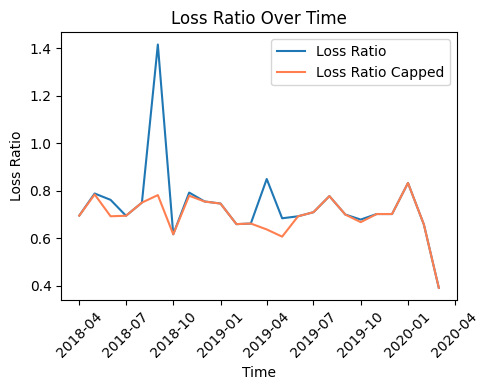

In [96]:
df_lrvstime=dfMY.groupby("month_year").agg({'net_earned_premium':'sum','incurred':'sum','capped_incurred':'sum'}).reset_index()
df_lrvstime['loss_ratio'] = df_lrvstime['incurred'] / df_lrvstime['net_earned_premium']
df_lrvstime['capped_loss_ratio'] = df_lrvstime['capped_incurred'] / df_lrvstime['net_earned_premium']
plt.figure(figsize=(5,4))
sns.lineplot(data=df_lrvstime,x="month_year",y="loss_ratio",label="Loss Ratio")
sns.lineplot(data=df_lrvstime,x="month_year",y="capped_loss_ratio",label="Loss Ratio Capped",color='coral')
plt.title('Loss Ratio Over Time')
plt.xlabel('Time')
plt.ylabel('Loss Ratio')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

loss ratio is a measurement of incurred costs divided by NEP. It shows the ratio of how much the company is paying out in claims vs how much it is receiving from premiums. As such, a lower loss ratio is preferable. We can see that in the month with a major claim, the loss ratio went above 1 meaning the company lost money. this show the impact of catastrophic accidents. However, when accounting for capped_incurred, we can see the loss ratio is generally below 1. This suggests at standard procedure, the company makes more in premiums than it pays out in claims which is what you'd expect. In 2020, we see a major decline in loss ratio. This is consistent with other insights that show the amount of claims and exposure decreased in this time. 

## Claim Size Indicator Analysis

### Regional

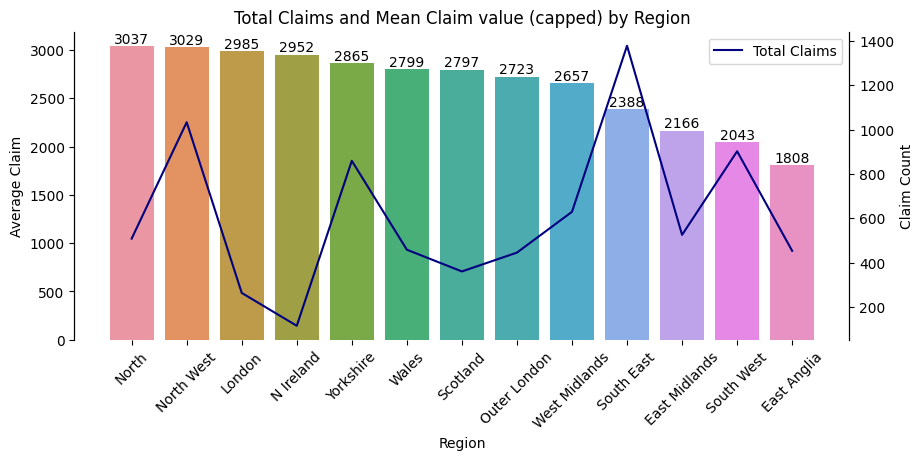

In [97]:
df_region=dfMY2.groupby("region").agg({"claim_count":'sum',"capped_incurred":"mean"}).reset_index()
df_region = df_region.sort_values(by='capped_incurred', ascending=False)
fig, ax1 = plt.subplots(figsize=(10, 4))
sns.barplot(data=df_region,x="region",y="capped_incurred")
plt.legend(edgecolor="white",loc="center left",bbox_to_anchor=(0.65,0.95))
plt.xticks(rotation=45)
ax1.set_xlabel("Region")
ax1.set_ylabel("Average Claim")
ax1.bar_label(ax1.containers[0], fontsize=10, fmt='%d',label_type='edge');
#ax1.legend(loc="upper right")
ax2=ax1.twinx()
sns.lineplot(data=df_region,ax=ax2,x="region",y="claim_count",color="navy",label="Total Claims")
ax2.set_ylabel("Claim Count")
#ax2.legend(loc=0)
plt.legend()
sns.despine(top=True,right=False,bottom=True)
plt.title("Total Claims and Mean Claim value (capped) by Region")
plt.show()

### Driver age

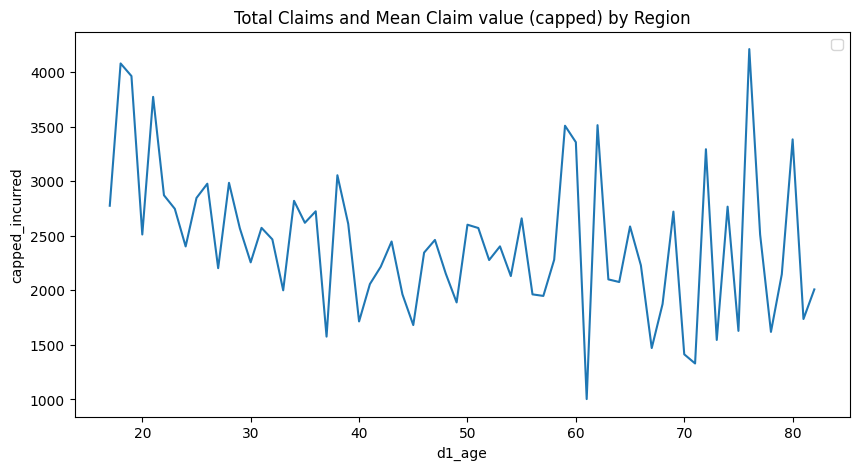

In [98]:
df_d1age=dfMY2.groupby("d1_age").agg({"capped_incurred":"mean"}).reset_index()
fig = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df_d1age,x="d1_age",y="capped_incurred")
plt.legend()
plt.title("Total Claims and Mean Claim value (capped) by Region")
plt.show()


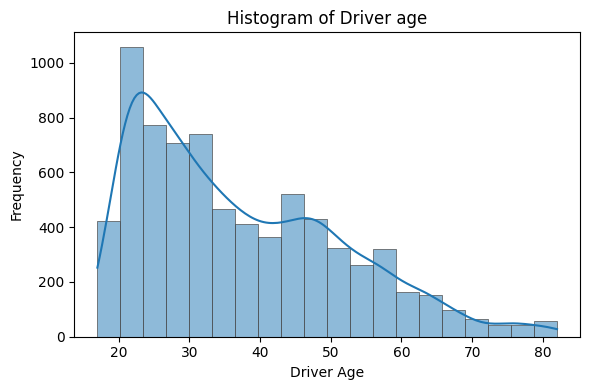

In [99]:
plt.figure(figsize=(6, 4))
sns.histplot(data=dfMY2,x='d1_age',
    bins=20,
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    kde=True,
    log_scale=False)
plt.title('Histogram of Driver age')
plt.xlabel('Driver Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Entitlement (number of drivers)

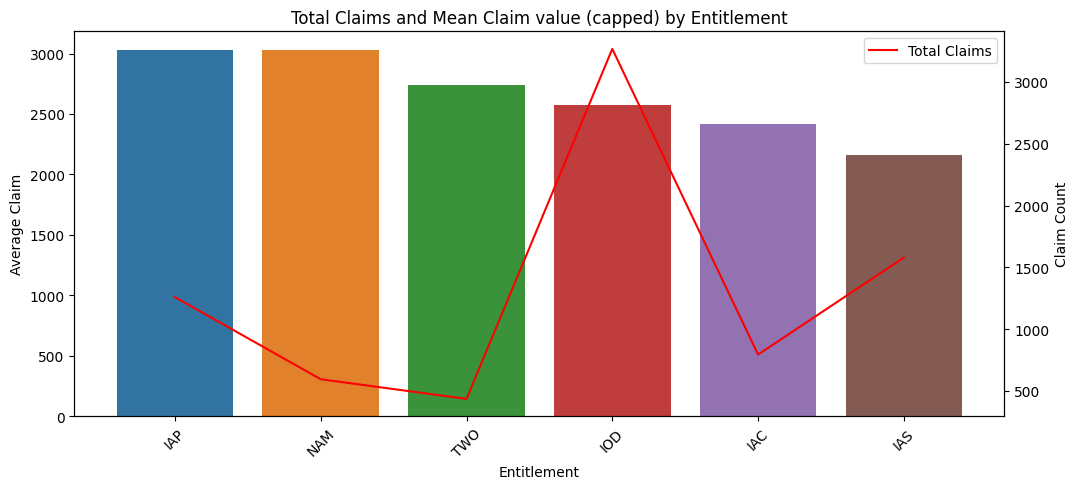

In [100]:
df_ent=dfMY2.groupby("entitlement").agg({"claim_count":'sum',"capped_incurred":"mean"}).reset_index()
df_ent = df_ent.sort_values(by='capped_incurred', ascending=False)
fig, ax1 = plt.subplots(figsize=(12, 5))
sns.barplot(data=df_ent,x="entitlement",y="capped_incurred")
plt.legend(edgecolor="white",loc="center left",bbox_to_anchor=(0.65,0.95))
plt.xticks(rotation=45)
ax1.set_xlabel("Entitlement")
ax1.set_ylabel("Average Claim")
#ax1.legend(loc="upper right")
ax2=ax1.twinx()
sns.lineplot(data=df_ent,ax=ax2,x="entitlement",y="claim_count",color="red",label="Total Claims")
ax2.set_ylabel("Claim Count")
#ax2.legend(loc=0)
plt.legend()
plt.title("Total Claims and Mean Claim value (capped) by Entitlement")
plt.show()

### Driver age binned

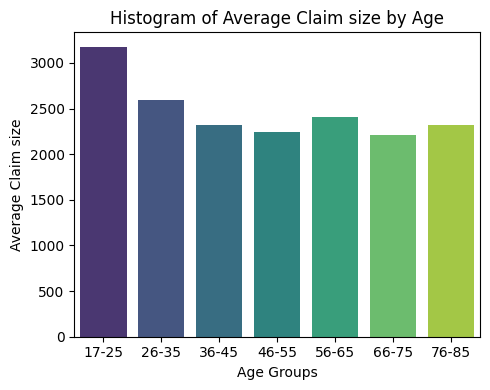

In [101]:
dfMY2_hist=dfMY2
agebins = [17, 25, 35, 45, 55, 65, 75, 85]
agelabels = ['17-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85']
dfMY2_hist['age_group'] = pd.cut(dfMY2_hist['d1_age'], bins=agebins, labels=agelabels, right=False)
df_agehis = dfMY2_hist.groupby('age_group').agg({'capped_incurred':'mean'}).reset_index()
plt.figure(figsize=(5, 4))
sns.barplot(data=df_agehis, x='age_group', y='capped_incurred', palette='viridis')
plt.title('Histogram of Average Claim size by Age')
plt.xlabel('Age Groups')
plt.ylabel('Average Claim size')
plt.tight_layout()
plt.show()

### cover
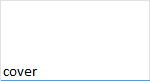
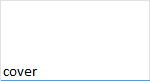
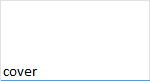
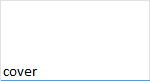

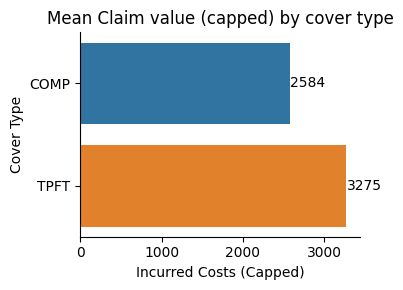

In [102]:
df_cover=dfMY2.groupby("cover").agg({"capped_incurred":"mean"}).reset_index()
fig,ax = plt.subplots(figsize=(4, 3))
sns.barplot(data=df_cover,y="cover",x="capped_incurred",orient="h")
plt.xlabel("Incurred Costs (Capped)")
plt.ylabel("Cover Type")
plt.title("Mean Claim value (capped) by cover type")
ax.bar_label(ax.containers[0], fontsize=10, fmt='%d');
plt.tight_layout()
ax=sns.despine(top=True,right=True,bottom=False)
plt.show()

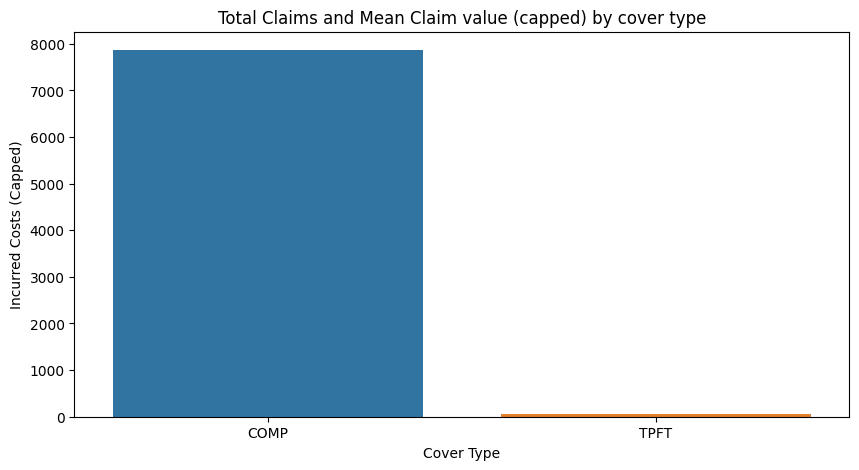

In [103]:
df_covercount=dfMY.groupby("cover").agg({"claim_count":"sum"}).reset_index()
fig = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_covercount,x="cover",y="claim_count")
plt.xlabel("Cover Type")
plt.ylabel("Incurred Costs (Capped)")
plt.title("Total Claims and Mean Claim value (capped) by cover type")
plt.show()

At first glance this result is surprising, since COMP is full cover that covers more damages you'd expect it to have a higher average claim size. However, it can be explained by referring to other insights. We found out that there is a possible inverse relationship between claim frequency and claim size. since COMP coverage is more common, it could be that a larger proportion of COMP claims are smaller incidents with lower damages, pushing down the average despite having more cover. For example, if a car bumps into your car, COMP would cover it but TPFT won't, and this would be a small claim. Conersely, TPFT covers only theft, fire and 3rd party damages. These are less common but more serious claims. So whilst COMP would also cover these, it also covers a lot more small claims meaning COMP has higher claim count but lower size whilst TPFT has lower claim count but higher size.

### vehicle value

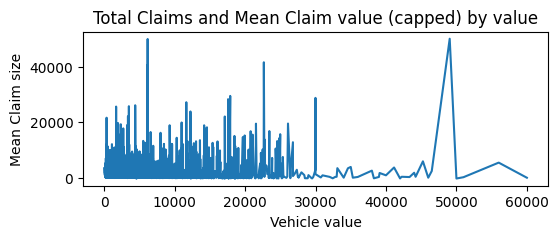

In [104]:
df_vv=dfMY2.groupby("vehicle_value").agg({"capped_incurred":"mean"}).reset_index()
fig = plt.subplots(figsize=(6, 2))
sns.lineplot(data=df_vv,x="vehicle_value",y="capped_incurred")
plt.xlabel("Vehicle value")
plt.ylabel("Mean Claim size")
plt.title("Total Claims and Mean Claim value (capped) by value")
plt.show()

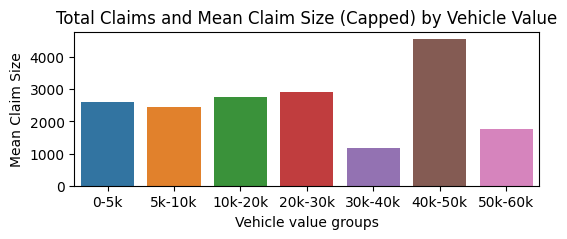

In [105]:
dfMY2_hist22=dfMY2
value_bins = [0, 5000, 10000, 20000, 30000, 40000, 50000, 60000]
value_labels = ['0-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k']
dfMY2_hist22['vehicle_value_group'] = pd.cut(dfMY2_hist22['vehicle_value'], bins=value_bins, labels=value_labels, right=False)
df_vv = dfMY2_hist22.groupby('vehicle_value_group').agg({"capped_incurred": "mean"}).reset_index()
fig = plt.subplots(figsize=(6, 2))
sns.barplot(data=df_vv, x="vehicle_value_group", y="capped_incurred")
plt.title("Total Claims and Mean Claim Size (Capped) by Vehicle Value")
plt.xlabel("Vehicle value groups")
plt.ylabel("Mean Claim Size")
plt.show()

### voluntary excess

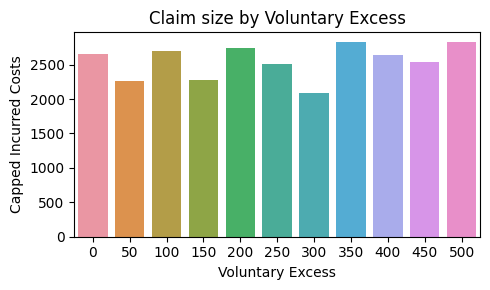

In [106]:
df_ve=dfMY2.groupby("voluntary_xs").agg({"capped_incurred":"mean"}).reset_index()
plt.figure(figsize=(5,3))
sns.barplot(data=df_ve,x="voluntary_xs",y="capped_incurred")
sns.lineplot()
plt.title("Claim size by Voluntary Excess")
plt.xlabel("Voluntary Excess")
plt.ylabel("Capped Incurred Costs")
plt.tight_layout()
plt.show()